In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset
from skimage import io, transform

%matplotlib inline

In [15]:
class CaptchaDataset(Dataset):
    """Captcha image dataset
    
        Inspired by: https://pytorch.org/tutorials/beginner/data_loading_tutorial.html
    """
    def __init__(self, csv_file, root_dir, transform=None):
        "for training, csv_file = input/train_folds.csv"
        self.squares_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.squares_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.squares_frame.iloc[idx, 0])

        image = io.imread(img_name)
        squares = self.squares_frame.iloc[idx, 1]
        """ tensor = transforms.functional.to_tensor(image)
        ts_mean = torch.mean(tensor, [1,2]).numpy()
        ts_std = torch.std(tensor, [1,2]).numpy()
        transform = transforms.Compose([
            transforms.ToTensor(), 
            transforms.Normalize(mean=ts_mean, std=ts_std)
        ]) """
        if self.transform:
            image = self.transform(image)
        sample = {'image': image, 'squares': squares}
        return sample

0 (200, 200, 3) ()
1 (200, 200, 3) ()
2 (200, 200, 3) ()
3 (200, 200, 3) ()


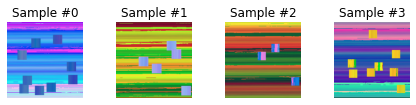

In [11]:
captcha_dataset = CaptchaDataset(csv_file='../input/train_folds.csv',
                                    root_dir='../input/captcha_examples')

fig = plt.figure()

for i in range(len(captcha_dataset)):
    sample = captcha_dataset[i]

    print(i, sample['image'].shape, sample['squares'].shape)

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    plt.imshow(sample["image"])

    if i == 3:
        plt.show()
        break

In [32]:
transform = transforms.ToTensor()

captcha_dataset = CaptchaDataset(
    csv_file='../input/all.csv',
    root_dir='../input/captcha_examples',
    transform=transform
)

n = len(captcha_dataset)
tensors = []

for i in range(n):
    ts = captcha_dataset[0]
    tensors.append(ts["image"])
    
outp=torch.stack(tensors)

In [33]:
outp.size()

torch.Size([88, 3, 200, 200])

In [44]:
torch.mean(outp, [0,2,3]).numpy()

array([0.41851586, 0.37706038, 0.52860934], dtype=float32)

In [45]:
torch.std(outp, [0,2,3]).numpy()

array([0.25431615, 0.32462418, 0.08905637], dtype=float32)